# Libraries

In [1]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tqdm import tqdm_notebook
from keras.datasets import mnist
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


### Reading data from prepared dataset 

In [2]:
data = pd.read_csv('C:/Users/madha/Downloads/Last Stage/dataset.csv').astype('float32')

In [3]:
data

,0,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,...,255.641,255.642,255.643,255.644,255.645,255.646,255.647,255.648,255.649,255.650
0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,254.0,252.0,252.0,252.0,254.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137204,134.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,252.0,247.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
137205,134.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,253.0,252.0,...,204.0,179.0,167.0,170.0,191.0,214.0,234.0,247.0,253.0,255.0
137206,134.0,233.0,236.0,242.0,249.0,252.0,254.0,255.0,255.0,255.0,...,240.0,239.0,240.0,242.0,246.0,249.0,252.0,254.0,255.0,255.0
137207,134.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,249.0,252.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


# Data Splitting 

### Data is split into images and respective labels

In [4]:
X = data.drop('0',axis = 1)
y = data['0']

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.14285)


### Reshaping data to form an image 

In [6]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [7]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (117608, 28, 28)
Test data shape:  (19601, 28, 28)


### Creating a dictionary to map integer values to specific characters 

In [8]:
# Dictionary for getting characters from index values...
symdict =  {0:'0',
                    1:'1',
                     2:'2',
                     3:'3',
                     4:'4',
                     5:'5',
                     6:'6',
                     7:'7',
                     8:'8',
                     9:'9',
                     10:'+',
                     11:'-',
                     12:'x',
                     13:'÷',
                     14:'(',
                     15:')',
                     16:'[',
                     17:']',
                     18:'{',
                     19:'}',
                     20:'a',
                     21:'b',
                     22:'c',
                     23:'d', 
                     24:'e',
                     25:'f',
                     26:'g',
                     27:'h',
                     28:'i',
                     29:'j',
                     30:'k',
                     31:'l',
                     32:'m',
                     33:'n',
                     34:'o',
                     35:'p',
                     36:'q',
                     37:'r',
                     38:'s',
                     39:'t',
                     40:'u',
                     41:'v',
                     42:'w',
                     43:'x', 
                     44:'y',
                     45:'z',
                     46:'A',
                     47:'B',
                     48:'C', 
                     49:'D',
                     50:'E',
                     51:'F',
                     52:'G',
                     53:'H',
                     54:'I',
                     55:'J',
                     56:'K',
                     57:'L',
                     58:'M',
                     59:'N',
                     60:'O',
                     61:'P',
                     62:'Q',
                     63:'R',
                     64:'S',
                     65:'T',
                     66:'U',
                     67:'V',
                     68:'W',
                     69:'X',
                     70:'Y',
                     71:'Z',
                     72:'=',
                     73:'≠', 
                     74:'>',
                     75:'<',
                     76:'≥',
                     77:'≤',
                     78:'&',
                     79:'`',
                     80:':',
                     81:',',
                     82:'.',
                     83:'$',
                     84:'!',
                     85:'∃',
                     86:'@',
                     87:'∀',
                     88:'#',
                     89:'in',
                     90:'∞',
                     91:'∫',
                     92:'lim',
                     93:'log', 
                     94:'%',
                     95:'±',
                     96:'π',
                     97:'′',
                     98:'?',
                     99:'""',
                     100:'^',
                     101:'→',
                     102:'/',
                     103:'√',
                     104:'*',
                     105:'∑',
                     106:'~',
                     107:'_',
                     108:'sin',
                     109:'cos',
                     110:'tan',
                     111:'𝛂',
                     112:'β',
                     113:'𝛾', 
                     114:'δ',
                     115:'ε',
                     116:'ζ',
                     117:'𝜂',
                     118:'θ',
                     119:'λ', 
                     120:'μ',
                     121:'𝜈',
                     122:'π',
                     123:'ρ',
                     124:'σ',
                     125:'𝛕',
                     126:'Φ',
                     127:'ψ',
                     128:'ω',
                     129:'Ꭓ',
                     130:'ɩ',
                     131:'Κ',
                     132:'Ο',
                     133:'Ʊ',
                     134:'ξ'
            }

### Visualizing character count in the prepared dataset 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 42931 missing f

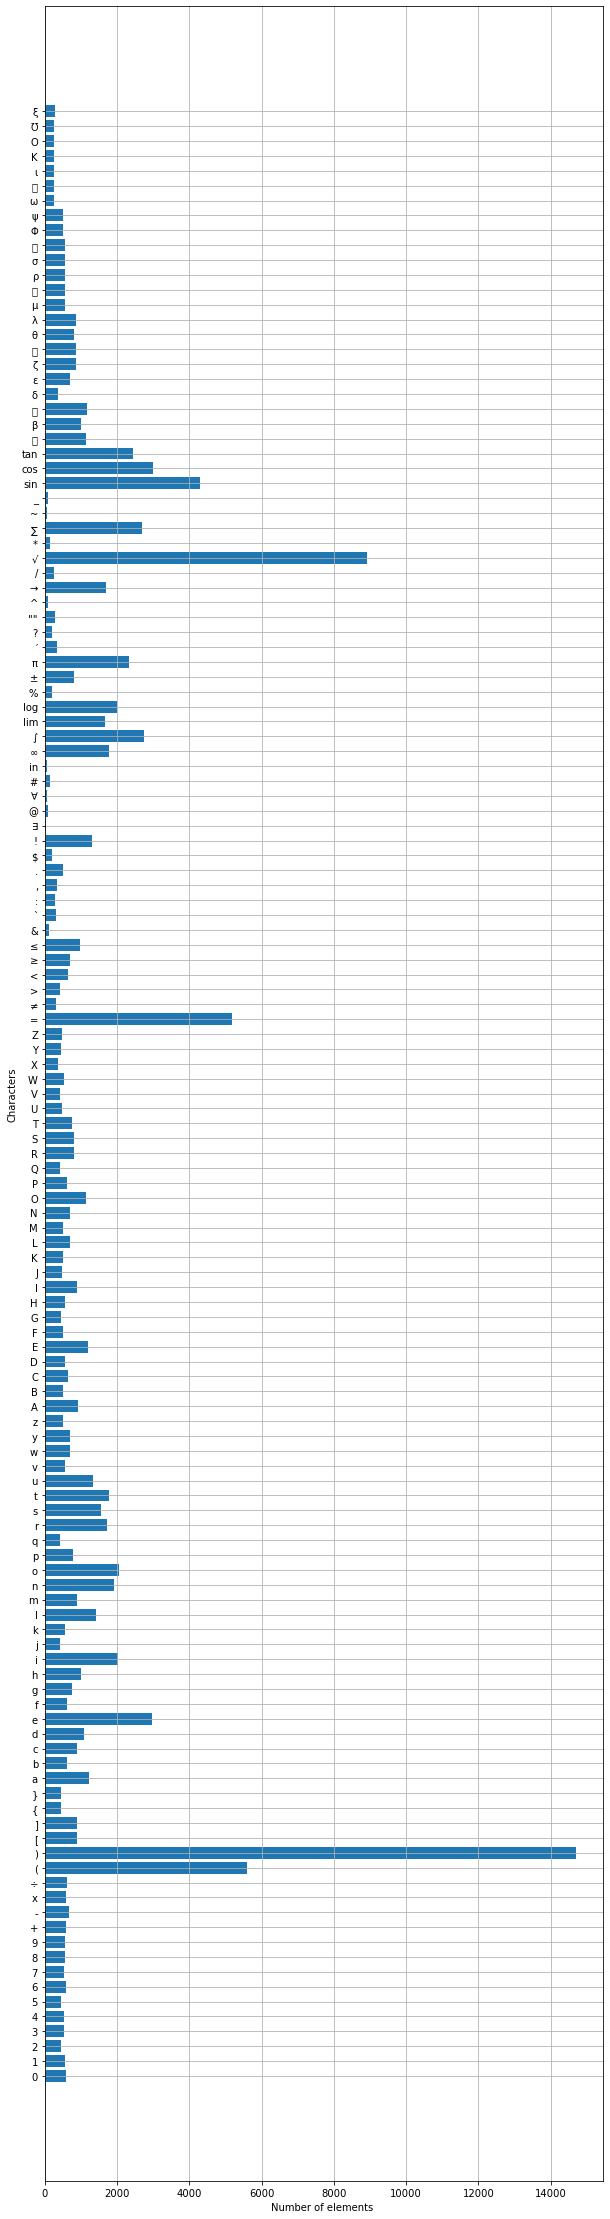

In [9]:
train_yint = np.int0(y)
count = np.zeros(135, dtype='int')
for i in train_yint:
    count[i] +=1

characters = []
for i in symdict.values():
    characters.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,40))
ax.barh(characters, count)

plt.xlabel("Number of elements ")
plt.ylabel("Characters")
plt.grid()
plt.show()

# Data Shuffling 

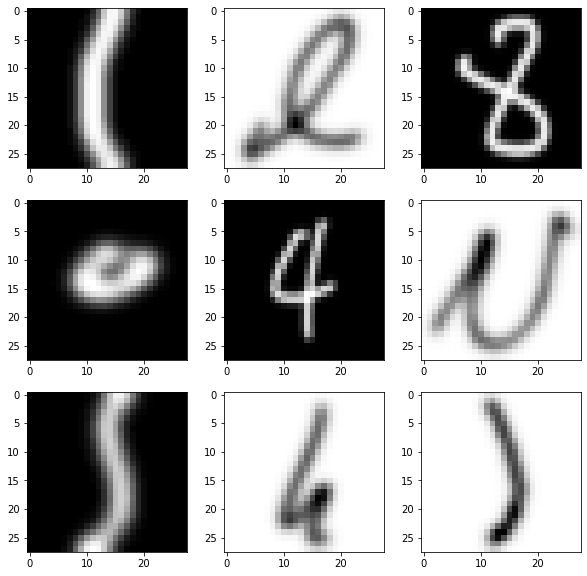

In [10]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

# Reshaping Data

In [11]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (117608, 28, 28, 1)
New shape of train data:  (19601, 28, 28, 1)


In [12]:
trainr_y = to_categorical(train_y, num_classes = 135, dtype='int')
print("New shape of train labels: ", trainr_y.shape)

testr_y = to_categorical(test_y, num_classes = 135, dtype='int')
print("New shape of test labels: ", testr_y.shape)

New shape of train labels:  (117608, 135)
New shape of test labels:  (19601, 135)


# CNN Model

In [13]:
model = Sequential()
############################

#First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

#First Max Pooling
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
################################

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
##################################################

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
###############################

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(135,activation ="softmax"))



# Model Compilation

In [14]:
model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.14, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


# Model Fitting

In [15]:
history = model.fit(train_X, trainr_y, epochs=20, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,testr_y))

Epoch 1/20
3676/3676 [==============================] - 68s 18ms/step - loss: 1.3830 - accuracy: 0.6195 - val_loss: 0.7044 - val_accuracy: 0.7858 - lr: 0.0010
Epoch 2/20
3676/3676 [==============================] - 79s 21ms/step - loss: 0.6185 - accuracy: 0.8062 - val_loss: 0.5248 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 3/20
3676/3676 [==============================] - 81s 22ms/step - loss: 0.4919 - accuracy: 0.8416 - val_loss: 0.4844 - val_accuracy: 0.8475 - lr: 0.0010
Epoch 4/20
3676/3676 [==============================] - 78s 21ms/step - loss: 0.4303 - accuracy: 0.8598 - val_loss: 0.4522 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 5/20
3676/3676 [==============================] - 80s 22ms/step - loss: 0.3942 - accuracy: 0.8699 - val_loss: 0.4274 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 6/20
3676/3676 [==============================] - 78s 21ms/step - loss: 0.3702 - accuracy: 0.8773 - val_loss: 0.4610 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 7/20
3676/3676 [========================

# Model Summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [17]:
model.save(r'model7.h5')

# Metrics

In [18]:
print("Validation accuracy :", history.history['val_accuracy'])
print("Training accuracy :", history.history['accuracy'])
print("Validation loss :", history.history['val_loss'])
print("Training loss :", history.history['loss'])

Validation accuracy : [0.7858272790908813, 0.8322534561157227, 0.8474567532539368, 0.8599561452865601, 0.8664354085922241, 0.8588847517967224, 0.9002091884613037, 0.9026580452919006, 0.9022498726844788]
Training accuracy : [0.6194561719894409, 0.8062461614608765, 0.8415924310684204, 0.8597544431686401, 0.8699322938919067, 0.8773382902145386, 0.9182538390159607, 0.9293415546417236, 0.9374276995658875]
Validation loss : [0.7043825387954712, 0.5248322486877441, 0.4844040870666504, 0.45221105217933655, 0.4274437725543976, 0.4609798491001129, 0.32877829670906067, 0.33153393864631653, 0.33493733406066895]
Training loss : [1.3829809427261353, 0.6184746026992798, 0.4919057786464691, 0.43028774857521057, 0.3941614627838135, 0.37017834186553955, 0.23218373954296112, 0.19903427362442017, 0.17543292045593262]


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

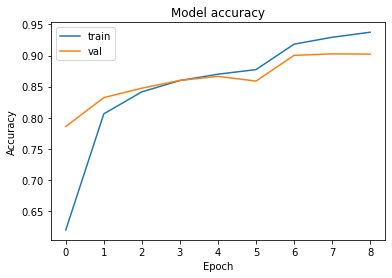

In [20]:
#plt.plot(history.history['accuracy'])
#plt.title('Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['train'], loc = 'upper left')
#plt.show

#import keras
#from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

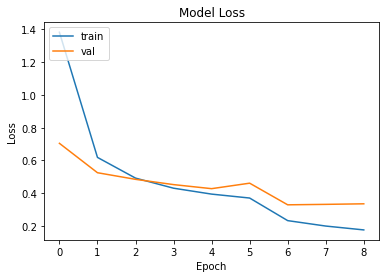

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predictions for testing data

In [22]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(19601, 28, 28, 1)


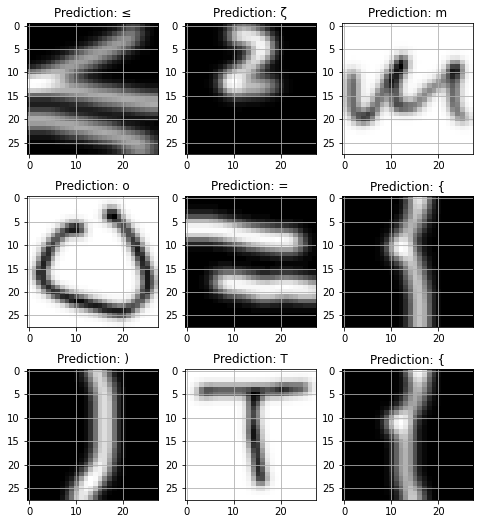

In [23]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = symdict[np.argmax(testr_y[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

# Predictions for provided image

img = cv2.imread(r'C:\Users\madha\Downloads\Last Stage\eq.png') #loaded image
img_copy = img.copy() #copied loaded image in img_copy
plt.figure()
plt.imshow(img_copy)  #display copied image
plt.show()


#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #apply BGR to RGB
#img = cv2.resize(img, (400,440)) #resize og image
#img_copy = cv2.GaussianBlur(img_copy, (7,7), 0) #apply gaussian blur to copied image
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) #covert BGR to Grayscale
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV) #apply binary inversion to grayscale

img_final = cv2.resize(img_thresh, (28,28)) #resize
img_final =np.reshape(img_final, (1,28,28,1)) #reshape to image form


img_pred = symdict[np.argmax(model.predict(img_final))]

print("Prediction: ", img_pred)

### Trial  

Image


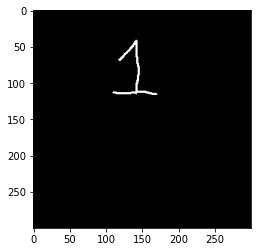

Contoured Image


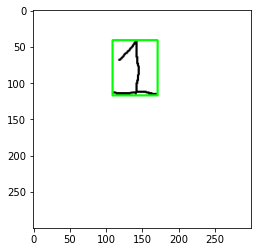

In [46]:
image = cv2.imread('try.png')
gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray.copy(), 127, 255, cv2.THRESH_BINARY_INV)
# _, contours, = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if imutils.is_cv2() else contours[1]
# contours = contours[0]
# contours[0] = <class 'numpy.ndarray'>
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Image")
plt.imshow(thresh, cmap="gray")
plt.show()
preprocessed_symb = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the character in the original image (for displaying the charaters fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the char from the image corresponding to the current contours in the for loop
    symb = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_symb = cv2.resize(symb, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_symb = np.pad(resized_symb, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_symb.append(padded_symb)
    
print("Contoured Image")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_symb)

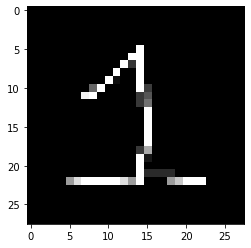

Prediction:  I


In [47]:
img_pred = []
for symb in preprocessed_symb:
    img_pred = symdict[np.argmax(model.predict(symb.reshape(1, 28, 28, 1)))]
    plt.imshow(symb.reshape(28, 28), cmap="gray")
    plt.show()
    print("Prediction: ", img_pred)